# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

From the course _Transition to Data Science_. [Buy the entire course for just $10](https://www.udemy.com/transition-to-data-science-in-python/?couponCode=CLUSTER-NBS) for many more exercises and helpful video lectures.

**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [2]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area                     210 non-null float64
perimeter                210 non-null float64
compactness              210 non-null float64
length                   210 non-null float64
width                    210 non-null float64
asymmetry_coefficient    210 non-null float64
groove_length            210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [4]:
x=seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [7]:
from  sklearn.cluster import KMeans
K=range(1,7)
#构建空列表
inertias=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)#inertia簇内误差平方和

[2719.852410177952,
 1011.7123453151189,
 587.3186115940427,
 471.0033955251922,
 385.62847109679774,
 323.2702720579794]

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

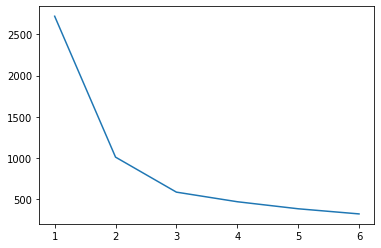

In [10]:
import matplotlib.pyplot as plt
plt.plot(K,inertias)
plt.xlabel('簇的个数')
plt.ylabel('簇内误差平方和')
plt.show()

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.